### Impact of Outliers

All outliers are not bad and some are useful for better prediction/improving model performance. For example, if heart beat is a feature in dataset , the iregularities in it might give some info about some disease/problem and help the model to improve

##### Which Machine Learning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--------                Not Sensitive To Outliers          
3. Linear Regression----------  Sensitive To Outliers
4. Logistic Regression-------   Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10. PCA-------------------------- Sensitive 
11. Neural Networks-------------- Sensitive


In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('../Day5-Feature_Scaling, Handling Missing Features/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

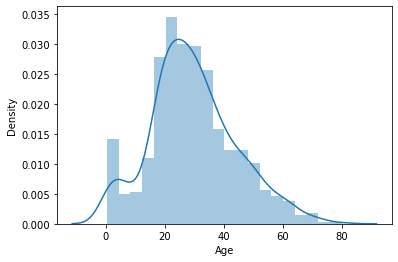

In [6]:
sns.distplot(df['Age'].dropna())

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

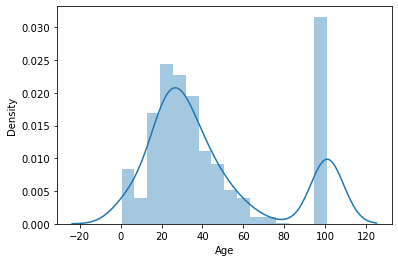

In [7]:
sns.distplot(df['Age'].fillna(101))

Text(0, 0.5, 'count of passengers')

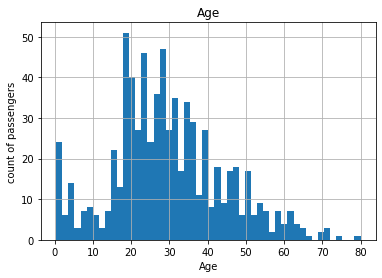

In [8]:
figure=df['Age'].hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('count of passengers')

The distribution is quite similar to that of gaussian distribution

Text(0.5, 1.0, 'Age')

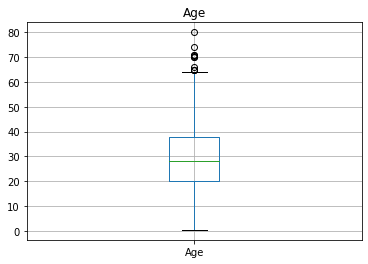

In [10]:
figure=df.boxplot(column='Age')
figure.set_title('Age')

In [11]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

if we assume age follows gaussian dist, we can make boundaries to differentiate with outliers. 95% of data will be present within 3 std from mean as per CLT.

In [16]:
mean_age=df['Age'].mean()
low_bound=df['Age'].mean()-3.0*df['Age'].std()
up_bound=df['Age'].mean()+3.0*df['Age'].std()
print('lower bound is {} and upper bound is {}:'.format(low_bound,up_bound))

lower bound is -13.88037434994331 and upper bound is 73.27860964406095:


So, the range will be 0 to 73.27 as age cannot be -ve

In [23]:
IQR= df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
print('IQR:',IQR)
low_bound=df['Age'].quantile(0.25)-(IQR*1.5)
up_bound=df['Age'].quantile(0.75)+(IQR*1.5)
print('lower bound is {} and upper bound is {}:'.format(low_bound,up_bound))

IQR: 17.875
lower bound is -6.6875 and upper bound is 64.8125:


In [24]:
#EXTREME OUTLIERS
IQR= df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
print('IQR:',IQR)
low_bound=df['Age'].quantile(0.25)-(IQR*3)
up_bound=df['Age'].quantile(0.75)+(IQR*3)
print('lower bound is {} and upper bound is {}:'.format(low_bound,up_bound))

IQR: 17.875
lower bound is -33.5 and upper bound is 91.625:


#### If features are squewed

Text(0, 0.5, 'count of passengers')

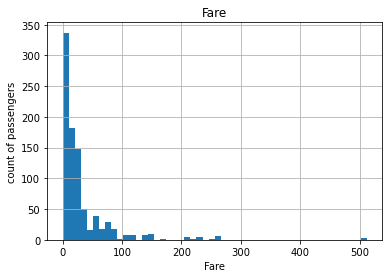

In [25]:
figure=df['Fare'].hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('count of passengers')

Text(0.5, 1.0, 'Fare')

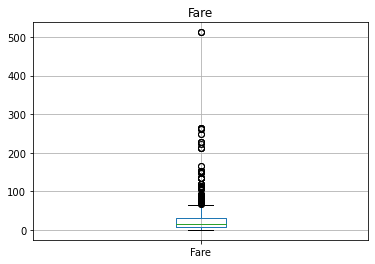

In [26]:
figure=df.boxplot(column='Fare')
figure.set_title('Fare')

In [27]:
IQR= df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)
print('IQR:',IQR)
low_bound=df['Fare'].quantile(0.25)-(IQR*1.5)
up_bound=df['Fare'].quantile(0.75)+(IQR*1.5)
print('lower bound is {} and upper bound is {}:'.format(low_bound,up_bound))

IQR: 23.0896
lower bound is -26.724 and upper bound is 65.6344:


In [28]:
IQR= df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)
print('IQR:',IQR)
low_bound=df['Fare'].quantile(0.25)-(IQR*3)
up_bound=df['Fare'].quantile(0.75)+(IQR*3)
print('lower bound is {} and upper bound is {}:'.format(low_bound,up_bound))

IQR: 23.0896
lower bound is -61.358399999999996 and upper bound is 100.2688:


#### Z Score - (x-mean)/std

In [29]:
from scipy import stats
chk=stats.zscore(df['Age'],nan_policy='omit')
print(chk)

[-0.53037664  0.57183099 -0.25482473  0.36516706  0.36516706         nan
  1.67403863 -1.90813618 -0.18593675 -1.08148046 -1.77036023  1.94959054
 -0.6681526   0.64071897 -1.08148046  1.74292661 -1.90813618         nan
  0.08961515         nan  0.36516706  0.29627909 -1.01259248 -0.11704878
 -1.49480832  0.57183099         nan -0.73704057         nan         nan
  0.70960695         nan         nan  2.50069435 -0.11704878  0.8473829
         nan -0.59926462 -0.80592855 -1.08148046  0.70960695 -0.18593675
         nan -1.83924821 -0.73704057         nan         nan         nan
         nan -0.80592855 -1.5636963  -0.59926462  1.32959874 -0.0481608
  2.43180638         nan -0.59926462 -0.08260479 -1.70147225 -1.28814439
 -0.53037664  0.57183099  1.05404683 -1.77036023         nan         nan
 -0.0481608  -0.73704057 -0.87481653 -0.25482473  0.15850313 -0.9437045
 -0.59926462 -0.25482473  0.15850313 -0.32371271         nan         nan
 -1.98873512  0.02072718 -0.53037664 -0.0481608       

For whatever the values greater than or lower than the boundaries, we can replace them with respectibe boundaries

#### Replacing outlier values

If we have large datasets , we can remove them, but for smaller ones its better to replace them.

In [30]:
data_copy=df.copy()
data_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
data_copy.loc[data_copy['Age']>73.27,'Age']=73
data_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
data_copy.loc[data_copy['Fare']>100,'Fare']=100
data_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now lets check the dist after removing outliers

Text(0, 0.5, 'count of passengers')

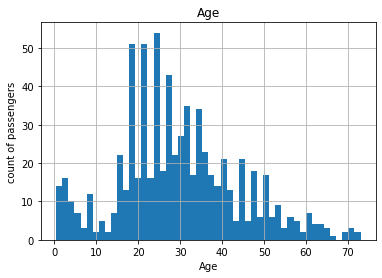

In [33]:
figure=data_copy['Age'].hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('count of passengers')

Text(0.5, 1.0, 'Age')

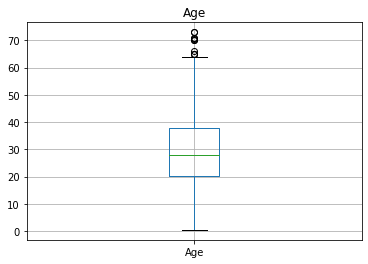

In [34]:
figure=data_copy.boxplot(column='Age')
figure.set_title('Age')

Text(0, 0.5, 'count of passengers')

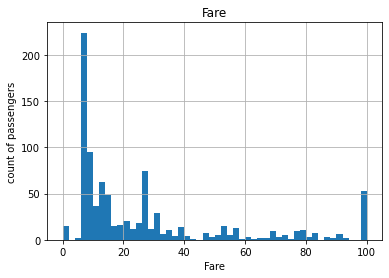

In [35]:
figure=data_copy['Fare'].hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('count of passengers')

Text(0.5, 1.0, 'Fare')

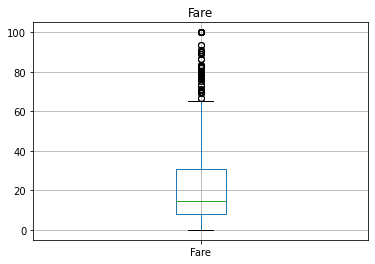

In [36]:
figure=data_copy.boxplot(column='Fare')
figure.set_title('Fare')

#### Testing

Lets check whether the handling of outliers has any impact on the models

##### LogisticRegression Before:::

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
x_train,x_test,y_train,y_test=train_test_split(df[['Age','Fare']],df['Survived'],test_size=0.25,random_state=42)
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
y_pred1=log.predict_proba(x_test)
print('accuracy_score is {}:'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score is {}:'.format(roc_auc_score(y_test,y_pred1[:,1])))

accuracy_score is 0.6636771300448431:
roc_auc_score is 0.7600620493040418:


##### LogisticRegression After:::

In [38]:
data_copy['Age'].fillna(data_copy['Age'].mean(),inplace=True)
data_copy['Fare'].fillna(data_copy['Fare'].mean(),inplace=True)
x_train,x_test,y_train,y_test=train_test_split(data_copy[['Age','Fare']],data_copy['Survived'],test_size=0.25,random_state=42)
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
y_pred1=log.predict_proba(x_test)
print('accuracy_score is {}:'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score is {}:'.format(roc_auc_score(y_test,y_pred1[:,1])))

accuracy_score is 0.6995515695067265:
roc_auc_score is 0.7643384202582593:


We can observe that the performance is increased

##### LogisticRegression Before:::

In [39]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(df[['Age','Fare']],df['Survived'],test_size=0.25,random_state=42)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred1=rf.predict_proba(x_test)
print('accuracy_score is {}:'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score is {}:'.format(roc_auc_score(y_test,y_pred1[:,1])))

accuracy_score is 0.6681614349775785:
roc_auc_score is 0.7078651685393258:


In [40]:
x_train,x_test,y_train,y_test=train_test_split(data_copy[['Age','Fare']],data_copy['Survived'],test_size=0.25,random_state=42)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred1=rf.predict_proba(x_test)
print('accuracy_score is {}:'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score is {}:'.format(roc_auc_score(y_test,y_pred1[:,1])))

accuracy_score is 0.6681614349775785:
roc_auc_score is 0.686525238973671:


The outlier changes doesnt have impact on the ensemble technique used above 